# Regression and Classification using PyTorch
---

In this notebook, we will be having a look at the how to perform regression and classification using PyTorch, using neural networks. 

## Importing Dependencies
---

Let us begin by importing all the necesary dependencies.

In [1]:
import torch
from torch import nn, optim
import random
import numpy
import math
from IPython import display

from res.plot_lib import *
from matplotlib import pyplot as plt

In [2]:
# initializing the default plotting behaviour
set_default()

In [3]:
# setting the default device as the GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

Now, let us create the data that we will be using for the regression task.

In [4]:
# Setting seed as 1 fixes the random nature of PyTorch and 
# random module to generate the same "random" data each time
seed = 1
random.seed(1)
torch.manual_seed(seed)
N = 1_000 # number of samples per class
D = 1 # dimensions
C = 1 # number of classes
H = 100 # number of hidden units

# generating the data and the x and y matrices
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = x.pow(3) + 0.3 * torch.rand(x.size()).to(device)

Now that we have generated the data, let us move on to the next step where we will try to fit a linear regression (and later a polynomial regression model) to the data.

## Regression
---

In a regression task, the aim is to find a line that roughly estimates the distribution of the data in a multi-dimensional space, using the various features available. 

Talking in terms of matrices, each row within the matrix can be thought of as a data instance. On the other hand, the columns of the matrix can be thought of as the features. 

Let us now see how to perform regression using PyTorch. First we will be working on a linear regression model, or in terms of Deep Learning terminology, a single-layered network. 

NOTE: Despite using the nn.Linear layer twice, there is not non-linearity between these two layers. As a result, with the help of basic linear algebra, we can interpret the two layers into a single layer. 

In [5]:
# setting the learning rate
learn_rate = 1e-3
# setting the l2 norm hyperparameter
lambda_l2 = 1e-5

In [6]:
# creating the sequential model
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C),                 
)

# moving the model to GPU (if CUDA is available)
model.to(device)

# declaring the loss function
criterion = nn.MSELoss()

# setting up the optimization function with l2 regularization
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate, weight_decay=lambda_l2)

Now that we have defined the model, the optimizer function and the loss function, let us move on to the training part.

In [7]:
# setting the number of training epochs
num_epochs = 1_001

# training
for epoch in range(num_epochs):
    
    # generating the predictions
    y_hat = model(x)
    
    # computing the loss
    loss = criterion(y_hat, y)
    if epoch % 100 == 0:
        print(f"EPOCH: {epoch}    LOSS: {loss.item()}")
    
    # resetting the gradients
    optimizer.zero_grad()
    
    ## backpropagation step
    # calculation of loss gradients
    loss.backward()
    # gradient optimization
    optimizer.step()

EPOCH: 0    LOSS: 0.3036157488822937
EPOCH: 100    LOSS: 0.031082183122634888
EPOCH: 200    LOSS: 0.029709521681070328
EPOCH: 300    LOSS: 0.029700707644224167
EPOCH: 400    LOSS: 0.02970064990222454
EPOCH: 500    LOSS: 0.02970065362751484
EPOCH: 600    LOSS: 0.02970065549015999
EPOCH: 700    LOSS: 0.02970065362751484
EPOCH: 800    LOSS: 0.02970065549015999
EPOCH: 900    LOSS: 0.029700657352805138
EPOCH: 1000    LOSS: 0.02970065549015999


In [8]:
# plotting the trained model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


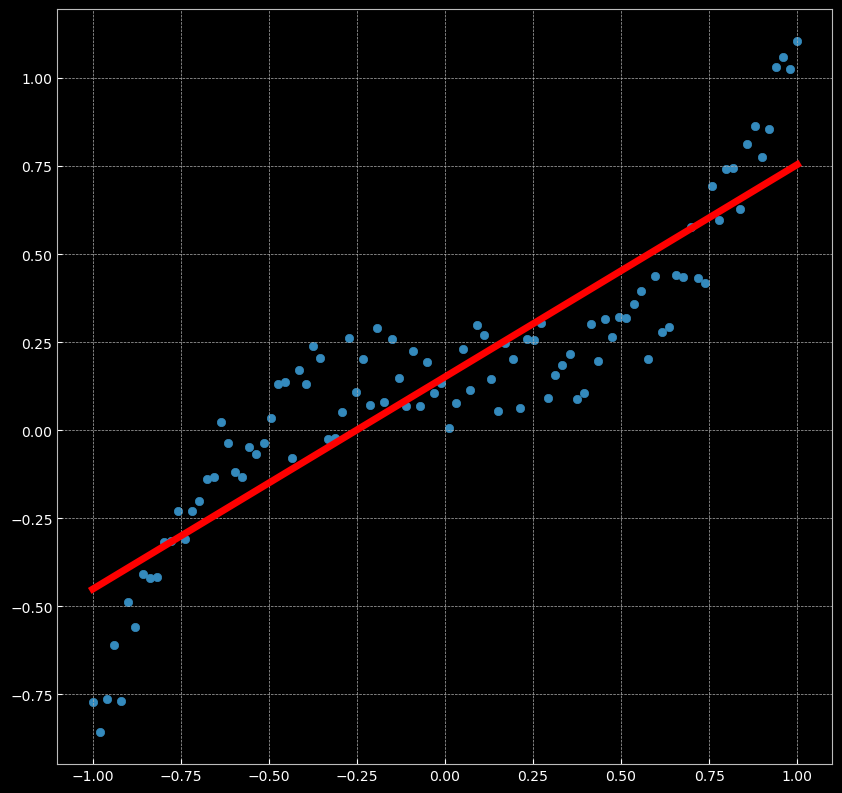

In [9]:
# plotting the results
plt.scatter(x.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(x.data.cpu().numpy(), y_hat.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

Now. we will be implementing a polynomial regression model. For this, we will implement a two-layered neural network. Also, the non-linearity of choice here is the

In [10]:
# defining a two layered model
model2 = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C),
)

# moving the model to device
model2.to(device)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [11]:
# defining the loss function/criterion
criterion2 = nn.MSELoss()

# defining the optimization function
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learn_rate, weight_decay=lambda_l2)

In [12]:
num_epochs = 1001

# training the model
for epoch in range(num_epochs):
    # predicting the model outputs
    y_hat = model2(x)
    # loss caclutation
    loss = criterion2(y_hat, y)
    if not(epoch % 100):
        print(f"EPOCH: {epoch}    LOSS: {loss.item()}")
    # clearing the gradients
    optimizer2.zero_grad()
    # backprop step
    loss.backward()
    # updating params
    optimizer2.step()

EPOCH: 0    LOSS: 0.42141249775886536
EPOCH: 100    LOSS: 0.020221807062625885
EPOCH: 200    LOSS: 0.011356085538864136
EPOCH: 300    LOSS: 0.007936183363199234
EPOCH: 400    LOSS: 0.0070286341942846775
EPOCH: 500    LOSS: 0.006631487514823675
EPOCH: 600    LOSS: 0.006458146497607231
EPOCH: 700    LOSS: 0.006372314412146807
EPOCH: 800    LOSS: 0.006326350849121809
EPOCH: 900    LOSS: 0.006291696336120367
EPOCH: 1000    LOSS: 0.006263843737542629


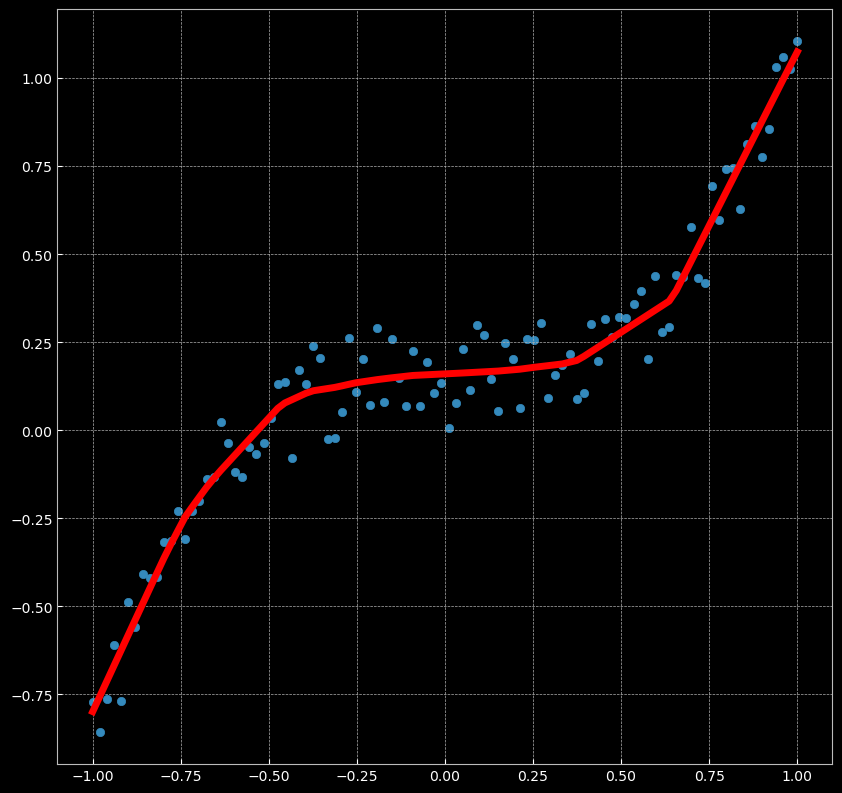

In [13]:
# plotting the results
plt.scatter(x.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(x.data.cpu().numpy(), y_hat.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

With this, we have completed the training for our regression model. As we can see, there was a significant drop in the model loss just by introducing a non-linearity between two affine transformations. 